In [1]:
import pandas as pd

In [2]:
m12 = pd.read_csv('evasão_12.csv')
m13 = pd.read_csv('evasão_13.csv')
m14 = pd.read_csv('evasão_14.csv')
m15 = pd.read_csv('evasão_15.csv')
m16 = pd.read_csv('evasão_16.csv')

In [3]:
m12.drop(columns=['Unnamed: 0'], inplace=True)
m13.drop(columns=['Unnamed: 0'], inplace=True)
m14.drop(columns=['Unnamed: 0'], inplace=True)
m15.drop(columns=['Unnamed: 0'], inplace=True)
m16.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
m12['Ano']=2012
m13['Ano']=2013
m14['Ano']=2014
m15['Ano']=2015
m16['Ano']=2016

In [5]:
evasao = pd.concat([m12, m13, m14, m15, m16])

In [6]:
evasao.columns.tolist()

['CO_PESSOA_FISICA',
 'NU_IDADE',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'CO_UF_NASC',
 'TP_ZONA_RESIDENCIAL',
 'TP_OUTRO_LOCAL_AULA',
 'IN_NECESSIDADE_ESPECIAL',
 'IN_CEGUEIRA',
 'IN_BAIXA_VISAO',
 'IN_SURDEZ',
 'IN_DEF_AUDITIVA',
 'IN_SURDOCEGUEIRA',
 'IN_DEF_FISICA',
 'IN_DEF_INTELECTUAL',
 'IN_DEF_MULTIPLA',
 'IN_AUTISMO',
 'IN_SINDROME_ASPERGER',
 'IN_SINDROME_RETT',
 'IN_TRANSTORNO_DI',
 'IN_SUPERDOTACAO',
 'TP_ETAPA_ENSINO',
 'TP_UNIFICADA',
 'TP_TIPO_TURMA',
 'CO_ENTIDADE',
 'TP_LOCALIZACAO',
 'TP_DEPENDENCIA',
 'TP_SEXO_F',
 'TP_SEXO_M',
 'Status_aprovado',
 'Status_evadido',
 'Status_repetente',
 'Ano',
 'TP_SEXO']

In [7]:
evasao.rename(columns={'CO_PESSOA_FISICA': 'ID',
                         'NU_IDADE': 'Idade',
                         'TP_SEXO': 'Sexo',
                         'TP_COR_RACA': 'Etnia',
                         'TP_NACIONALIDADE': 'Nacionalidade',
                         'CO_UF_NASC': 'UF_nasc',
                         'TP_ZONA_RESIDENCIAL': 'Zona_res',
                         'TP_OUTRO_LOCAL_AULA': 'Outro_local_aula',
                         'IN_NECESSIDADE_ESPECIAL': 'Necessidade_especial',
                         'IN_CEGUEIRA': 'Cegueira',
                         'IN_BAIXA_VISAO': 'Baixa_visao',
                         'IN_SURDEZ': 'Surdez',
                         'IN_DEF_AUDITIVA': 'Def_auditiva',
                         'IN_SURDOCEGUEIRA': 'Surdocegueira',
                         'IN_DEF_FISICA': 'Def_fisica',
                         'IN_DEF_INTELECTUAL': 'Def_intelectual',
                         'IN_DEF_MULTIPLA': 'Def_multipla',
                         'IN_AUTISMO': 'Autismo',
                         'IN_SINDROME_ASPERGER': 'Asperger',
                         'IN_SINDROME_RETT': 'Rett',
                         'IN_TRANSTORNO_DI': 'Transtorno_DI',
                         'IN_SUPERDOTACAO': 'Superdotacao',
                         'TP_ETAPA_ENSINO': 'Etapa_ensino',
                         'TP_UNIFICADA': 'Unificada',
                         'TP_TIPO_TURMA': 'Tipo_turma',
                         'CO_ENTIDADE': 'ID_escola',
                         'TP_LOCALIZACAO': 'Localizacao',
                         'TP_DEPENDENCIA': 'Administracao'}, inplace=True)

In [8]:
evasao.Sexo = evasao.Sexo.map({1:'M', 2:'F'})
evasao.Etnia = evasao.Etnia.map({0:'Não Declarada', 1:'Branca', 2:'Preta', 3:'Parda', 4:'Amarela', 5:'Indígena'})
evasao.Nacionalidade = evasao.Nacionalidade.map({1:'Brasileiro', 2:'Naturalizado', 3:'Extrangeiro'})
evasao.Zona_res = evasao.Zona_res.map({1:'Urbana', 2:'Rural'})
evasao.Outro_local_aula = evasao.Outro_local_aula.map({1:'Hospital', 2:'Domicilio', 3:'Não recebe'})
evasao.Unificada = evasao.Unificada.map({0:'Não', 1:'Unificada', 2:'Multietapa', 3:'Multi', 4:'Correção de fluxo', 5:'Mista'})
evasao.Tipo_turma = evasao.Tipo_turma.map({0:'Não se aplica', 1:'Classe Hospitalar', 2:'Unidade Socioeducativa',
                                           3:'Unidade prisional', 4:'Atividade complementar', 5:'At educacional especializado'})
evasao.Localizacao = evasao.Localizacao.map({1:'Urbana', 2:'Rural'})
evasao.Administracao = evasao.Administracao.map({1:'Federal', 2:'Estadual', 3:'Municipal', 4:'Privada'})

In [9]:
evasao.drop(columns=['UF_nasc'], inplace=True)
evasao.drop(columns=['TP_SEXO_F'], inplace=True)
evasao.drop(columns=['TP_SEXO_M'], inplace=True)
evasao.drop(columns=['Status_aprovado'], inplace=True)
evasao.drop(columns=['Status_repetente'], inplace=True)

In [10]:
#neces_esp_dummies = pd.get_dummies(evasao.Necessidade_especial, prefix='Especial')
#df = pd.concat([evasao, neces_esp_dummies], axis=1)
evasao = pd.get_dummies(evasao, columns=['Necessidade_especial', 'Sexo', 'Etnia', 'Nacionalidade', 'Zona_res', 'Outro_local_aula', 'Unificada','Tipo_turma', 'Localizacao', 'Administracao'], drop_first=True)
#pd.get_dummies(evasao)

In [11]:
evasao.columns.tolist()

['ID',
 'Idade',
 'Cegueira',
 'Baixa_visao',
 'Surdez',
 'Def_auditiva',
 'Surdocegueira',
 'Def_fisica',
 'Def_intelectual',
 'Def_multipla',
 'Autismo',
 'Asperger',
 'Rett',
 'Transtorno_DI',
 'Superdotacao',
 'Etapa_ensino',
 'ID_escola',
 'Status_evadido',
 'Ano',
 'Necessidade_especial_1',
 'Sexo_M',
 'Etnia_Branca',
 'Etnia_Indígena',
 'Etnia_Não Declarada',
 'Etnia_Parda',
 'Etnia_Preta',
 'Nacionalidade_Extrangeiro',
 'Nacionalidade_Naturalizado',
 'Zona_res_Urbana',
 'Outro_local_aula_Hospital',
 'Outro_local_aula_Não recebe',
 'Unificada_Multi',
 'Unificada_Multietapa',
 'Unificada_Não',
 'Tipo_turma_Não se aplica',
 'Tipo_turma_Unidade prisional',
 'Localizacao_Urbana',
 'Administracao_Federal',
 'Administracao_Municipal',
 'Administracao_Privada']

In [12]:
evasao.to_csv('evasao2.csv')

In [13]:
evasao.head(5)

,ID,Idade,Cegueira,Baixa_visao,Surdez,Def_auditiva,Surdocegueira,Def_fisica,Def_intelectual,Def_multipla,...,Outro_local_aula_Não recebe,Unificada_Multi,Unificada_Multietapa,Unificada_Não,Tipo_turma_Não se aplica,Tipo_turma_Unidade prisional,Localizacao_Urbana,Administracao_Federal,Administracao_Municipal,Administracao_Privada
0,110003605638,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,1,0,1,0,0,0
1,110011029594,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,1,0,1,0,0,0
2,110016658999,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,1,0,1,0,0,0
3,110017448025,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,1,0,1,0,1,0
4,110019238206,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,1,0,1,0,0,1


In [14]:
evasao = evasao.fillna(0)
evasao_features = evasao.drop(columns=['Status_evadido']).values
evasao_target = evasao['Status_evadido'].values


In [15]:
evasao['Status_evadido'].value_counts()/len(evasao)

0    0.820336
1    0.179664
Name: Status_evadido, dtype: float64

In [16]:
#Undersampling
y1 = evasao[evasao['Status_evadido']==1]
y0 = evasao[evasao['Status_evadido']==0]

In [17]:
y0_novo = y0.sample(n=len(y1))

In [18]:
y_novo = pd.concat([y1, y0_novo])
y_novo['Status_evadido'].unique()

array([1, 0], dtype=int64)

In [19]:
x_novo = y_novo.drop(columns=['Status_evadido']).values
y_novo = y_novo['Status_evadido'].values
print(x_novo.shape, y_novo.shape)


(339120, 39) (339120,)


In [20]:
from sklearn.model_selection import train_test_split
evasao_train, evasao_test, status_evadido_train, status_evadido_test = train_test_split(x_novo, y_novo, test_size = 0.2, random_state = 0)

In [21]:
evasao.isna().sum()

ID                              0
Idade                           0
Cegueira                        0
Baixa_visao                     0
Surdez                          0
Def_auditiva                    0
Surdocegueira                   0
Def_fisica                      0
Def_intelectual                 0
Def_multipla                    0
Autismo                         0
Asperger                        0
Rett                            0
Transtorno_DI                   0
Superdotacao                    0
Etapa_ensino                    0
ID_escola                       0
Status_evadido                  0
Ano                             0
Necessidade_especial_1          0
Sexo_M                          0
Etnia_Branca                    0
Etnia_Indígena                  0
Etnia_Não Declarada             0
Etnia_Parda                     0
Etnia_Preta                     0
Nacionalidade_Extrangeiro       0
Nacionalidade_Naturalizado      0
Zona_res_Urbana                 0
Outro_local_au

In [23]:
#Buscando melhores parâmetros- Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
min_samples = [2, 10, 50, 200, 1000]
n_est = [10, 20, 50, 100]
crit = ['entropy', 'gini']
for s in range(len(min_samples)):
  for n in range(len(n_est)):
    for c in range(len(crit)):
      print(s, n, c)
      print("n_estimators = ",  n_est[n], ", criterion = ", crit[c], ", min_samples_split = ", min_samples[s])
      classifier_RF = RandomForestClassifier(n_estimators = n_est[n], criterion = crit[c], min_samples_split = min_samples[s], random_state = 0)
      classifier_RF.fit(evasao_train, status_evadido_train)
      status_evadido_pred_RF = classifier_RF.predict(evasao_test)
      acuracia_RF = accuracy_score(status_evadido_test, status_evadido_pred_RF)
      print("Acuracia: ", acuracia_RF)
      cm_RF = confusion_matrix(status_evadido_test, status_evadido_pred_RF)
      print("Confusion Matrix: ")
      print(cm_RF)
      print()

0 0 0
n_estimators =  10 , criterion =  entropy , min_samples_split =  2
Acuracia:  0.8376533380514273
Confusion Matrix: 
[[29692  4023]
 [ 6988 27121]]

0 0 1
n_estimators =  10 , criterion =  gini , min_samples_split =  2
Acuracia:  0.8381988676574664
Confusion Matrix: 
[[29736  3979]
 [ 6995 27114]]

0 1 0
n_estimators =  20 , criterion =  entropy , min_samples_split =  2
Acuracia:  0.8396437839112998
Confusion Matrix: 
[[29562  4153]
 [ 6723 27386]]

0 1 1
n_estimators =  20 , criterion =  gini , min_samples_split =  2
Acuracia:  0.8398649445623968
Confusion Matrix: 
[[29571  4144]
 [ 6717 27392]]

0 2 0
n_estimators =  50 , criterion =  entropy , min_samples_split =  2
Acuracia:  0.8411476763387591
Confusion Matrix: 
[[29526  4189]
 [ 6585 27524]]

0 2 1
n_estimators =  50 , criterion =  gini , min_samples_split =  2
Acuracia:  0.8422682236376504
Confusion Matrix: 
[[29548  4167]
 [ 6531 27578]]

0 3 0
n_estimators =  100 , criterion =  entropy , min_samples_split =  2
Acuracia:  

KeyboardInterrupt: 

In [22]:
#melhores parâmetros- Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
classifier_RF = RandomForestClassifier(n_estimators =  100 , criterion =  "entropy" , min_samples_split =  50, random_state = 0)
classifier_RF.fit(evasao_train, status_evadido_train)
status_evadido_pred_RF = classifier_RF.predict(evasao_test)
acuracia_RF = accuracy_score(status_evadido_test, status_evadido_pred_RF)
print("Acuracia: ", acuracia_RF)
cm_RF = confusion_matrix(status_evadido_test, status_evadido_pred_RF)
print("Confusion Matrix: ")
print(cm_RF)
print()

Acuracia:  0.858943736730361
Confusion Matrix: 
[[31034  2681]
 [ 6886 27223]]



In [23]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(evasao_train, status_evadido_train)
status_evadido_pred_NB = classifier_NB.predict(evasao_test)
acuracia_NB = accuracy_score(status_evadido_test, status_evadido_pred_NB)
print("Acuracia: ", acuracia_NB)
cm_NB = confusion_matrix(status_evadido_test, status_evadido_pred_NB)
print("Confusion Matrix: ")
print(cm_NB)

Acuracia:  0.5596838877093654
Confusion Matrix: 
[[28893  4822]
 [25042  9067]]


In [ ]:
from sklearn.svm import SVC
classifier_SVM = SVC(kernel="rbf")
classifier_SVM.fit(evasao_train, status_evadido_train)
status_evadido_pred_SVM = classifier_SVM.predict(evasao_test)
acuracia_SVM = accuracy_score(status_evadido_test, status_evadido_pred_SVM)
print("Acuracia: ", acuracia_SVM)
cm_SVM= confusion_matrix(status_evadido_test, status_evadido_pred_SVM)
print("Confusion Matrix: ")
print(cm_SVM)

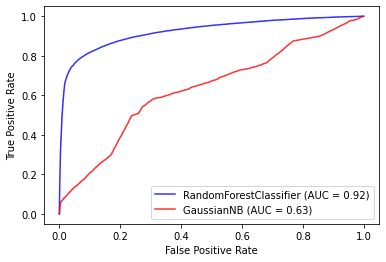

In [24]:
#ROC AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
ax = plt.gca()
rfc_disp = plot_roc_curve(classifier_RF, evasao_test, status_evadido_test, ax=ax, alpha=0.8, color = 'blue')
#svc_disp = plot_roc_curve(classifier_SVM, evasao_test, status_evadido_test, ax=ax, alpha=0.8, color = 'green')
nb_disp = plot_roc_curve(classifier_NB, evasao_test, status_evadido_test, ax=ax, alpha=0.8, color = 'red')
plt.show()

In [25]:
#Predict_proba
from pandas import DataFrame
from IPython.display import HTML
from random import sample
sample_evasao_test = sample(list(evasao_test),20)
pred_prob_RF = classifier_RF.predict_proba(sample_evasao_test)
HTML('<h1>Random Forest predict_proba</h1>'+DataFrame(pred_prob_RF).to_html())

,0,1
0,0.865342,0.134658
1,0.898513,0.101487
2,0.004645,0.995355
3,0.583029,0.416971
4,0.006050,0.993950
5,0.188032,0.811968
6,0.267823,0.732177
7,0.970259,0.029741
8,0.085963,0.914037
9,0.470506,0.529494


In [26]:
from pandas import DataFrame
from IPython.display import HTML
from random import sample
sample_evasao_test = sample(list(evasao_test),20)
pred_prob_NB = classifier_NB.predict_proba(sample_evasao_test)
HTML('<h1>Naive Bayes predict_proba</h1>'+DataFrame(pred_prob_NB).to_html())

,0,1
0,0.635110,0.364890
1,0.540682,0.459318
2,0.632469,0.367531
3,0.550405,0.449595
4,0.592088,0.407912
5,0.595316,0.404684
6,0.539472,0.460528
7,0.612760,0.387240
8,0.626374,0.373626
9,0.577733,0.422267


Status_evadido
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: predict_proba_RF, dtype: object

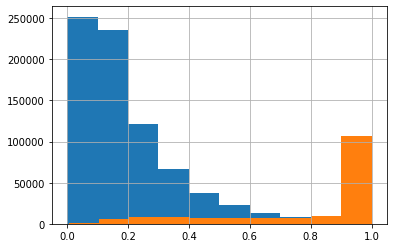

In [27]:
y_predict = classifier_RF.predict(evasao_features)
evasao['y_pred'] = y_predict
evasao['predict_proba_RF'] = classifier_RF.predict_proba(evasao_features)[:,1]
evasao.groupby('Status_evadido')['predict_proba_RF'].hist()

Status_evadido
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: predict_proba_NB, dtype: object

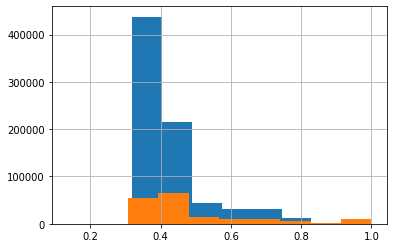

In [28]:
y_predict = classifier_NB.predict(evasao_features)
evasao['y_pred'] = y_predict
evasao['predict_proba_NB'] = classifier_NB.predict_proba(evasao_features)[:,1]
evasao.groupby('Status_evadido')['predict_proba_NB'].hist()

In [29]:
q = evasao['predict_proba_RF'].quantile([0.00, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00])
q

0.0    0.000000
0.1    0.051693
0.2    0.079976
0.3    0.109811
0.4    0.144348
0.5    0.187533
0.6    0.247254
0.7    0.341961
0.8    0.528112
0.9    0.954742
1.0    1.000000
Name: predict_proba_RF, dtype: float64

In [30]:
evasao['Status_evadido'].value_counts()/len(evasao)

0    0.820336
1    0.179664
Name: Status_evadido, dtype: float64

In [31]:
q = evasao['predict_proba_RF'].quantile([0.30, 0.60, 0.859, 1.00])
q = pd.DataFrame(q)
q.columns = ['prob']
q

,prob
0.300,0.109811
0.600,0.247254
0.859,0.799303
1.000,1.000000


In [32]:
analise_RF = {'Risco de Evasao':["Baixo", "Médio-baixo", "Médio-alto", "Alto"], 'Probab. de Evasão': ["Até 11%", "entre 11% e 24,5%", "entre 24,5% e 80%", "entre 80% e 100%"], '% da população': ["30%", "30%", "25,6%", "14,4%"]}
analise_RF = pd.DataFrame.from_dict(analise_RF, orient='columns')
analise_RF


,Risco de Evasao,Probab. de Evasão,% da população
0,Baixo,Até 11%,30%
1,Médio-baixo,"entre 11% e 24,5%",30%
2,Médio-alto,"entre 24,5% e 80%","25,6%"
3,Alto,entre 80% e 100%,"14,4%"


Feature: 0, Score: 0.18202
Feature: 1, Score: 0.27912
Feature: 2, Score: 0.00007
Feature: 3, Score: 0.00020
Feature: 4, Score: 0.00017
Feature: 5, Score: 0.00014
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00030
Feature: 8, Score: 0.00176
Feature: 9, Score: 0.00012
Feature: 10, Score: 0.00022
Feature: 11, Score: 0.00008
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00033
Feature: 14, Score: 0.00020
Feature: 15, Score: 0.35366
Feature: 16, Score: 0.06826
Feature: 17, Score: 0.04722
Feature: 18, Score: 0.00188
Feature: 19, Score: 0.00333
Feature: 20, Score: 0.00240
Feature: 21, Score: 0.00030
Feature: 22, Score: 0.00234
Feature: 23, Score: 0.00157
Feature: 24, Score: 0.00090
Feature: 25, Score: 0.00209
Feature: 26, Score: 0.00096
Feature: 27, Score: 0.00092
Feature: 28, Score: 0.00005
Feature: 29, Score: 0.00027
Feature: 30, Score: 0.00004
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00038
Feature: 33, Score: 0.00003
Feature: 34, Score: 0.00001
Feature: 35, Score: 0.00043
Fe

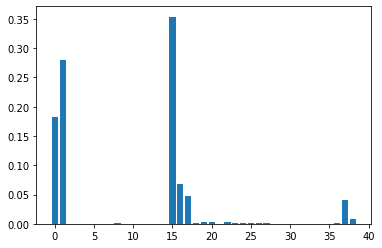

In [35]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# get importance
importance = classifier_RF.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [46]:
import numpy as np

importances = classifier_RF.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in classifier_RF.estimators_], axis=0)

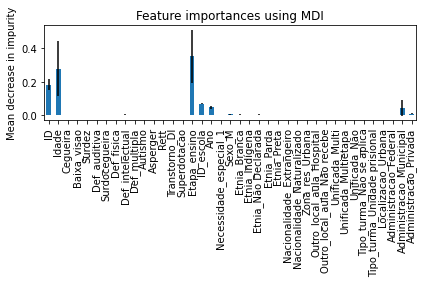

In [54]:
forest_importances = pd.Series(importances, index=evasao.drop(columns=['Status_evadido', 'y_pred', 'predict_proba_RF',
                                                                       'predict_proba_NB']).columns.tolist())

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
#curva roc, score probabilidade para todo o dataset classe.predict_proba, estudo de KomogorovSmirnoff (distâncias das classes negativas vs. classes positivas)
#histogram das distribuições de cada classe/decis e criar uma label por decis, feature importance, otimizar modelo grid search
#MLOPS - ML Operations (operacionalizar o modelo provido pelo cientista de dados)
#DataOps - Entrega em estruturas